# **Hotel Reservations Dataset**


| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


In [1]:
pip install dmba

In [2]:
pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [3]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
#load libraries and functions
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from dmba import stepwise_selection, regressionSummary, classificationSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree
from dmba import gainsChart
from sklearn.preprocessing import StandardScaler
from scipy.stats import yeojohnson
from sklearn.pipeline import make_pipeline, Pipeline

Colab environment detected.


In [4]:
#uploating the dataset
df = pd.read_csv("/content/drive/MyDrive/DS_for_business/project/Hotel Reservations.csv")
# display of first three rows  in the dataframe
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


## **Understanding the dataset**

In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [7]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
#Data types of columns in the dataset
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [10]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [11]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print(df['booking_status'].value_counts()/len(df))

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


Text(0, 0.5, 'Count')

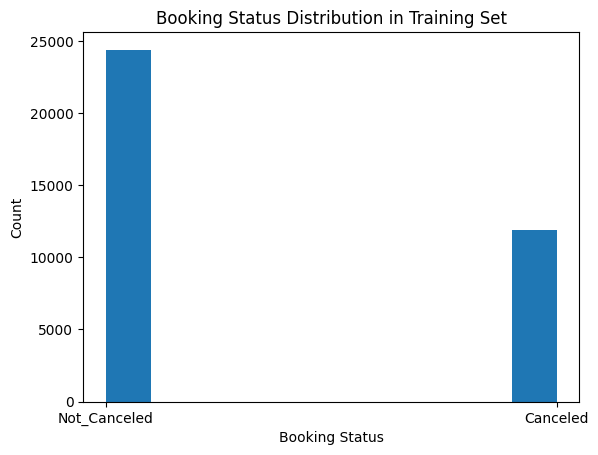

In [12]:
# Booking status distribution
plt.hist(df['booking_status'])
plt.title('Booking Status Distribution in Training Set')
plt.xlabel('Booking Status')
plt.ylabel('Count')

In [13]:
#Data from children?
adult_zero = pd.DataFrame(df[df['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

Not_Canceled    95
Canceled        44
Name: booking_status, dtype: int64

In [14]:
#Check for rows that report no adults or children
both = pd.DataFrame(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: booking_status, dtype: int64)

In [15]:
#Check if any reservations report being not a week or weekend day
no_day_type = pd.DataFrame(df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

In [16]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [17]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [18]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [19]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [20]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [21]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [22]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

## Data Preparation

In [23]:
# Drop non-predictors
df.drop(['Booking_ID'],axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [24]:
#Checking for missing data in the dataset
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [25]:
#The sum count of the duplicated values
df.duplicated().sum()

0

### **Outlier**

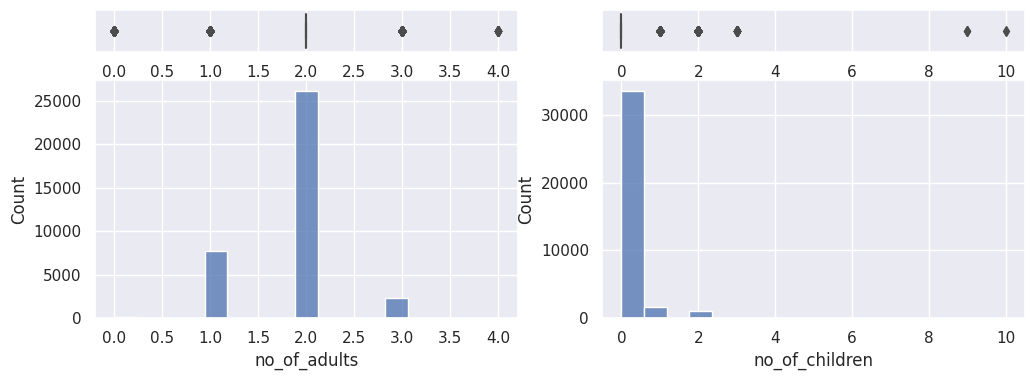

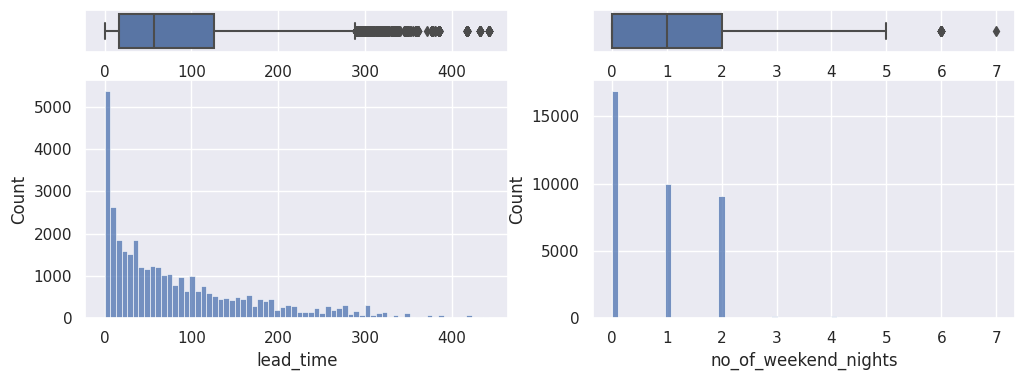

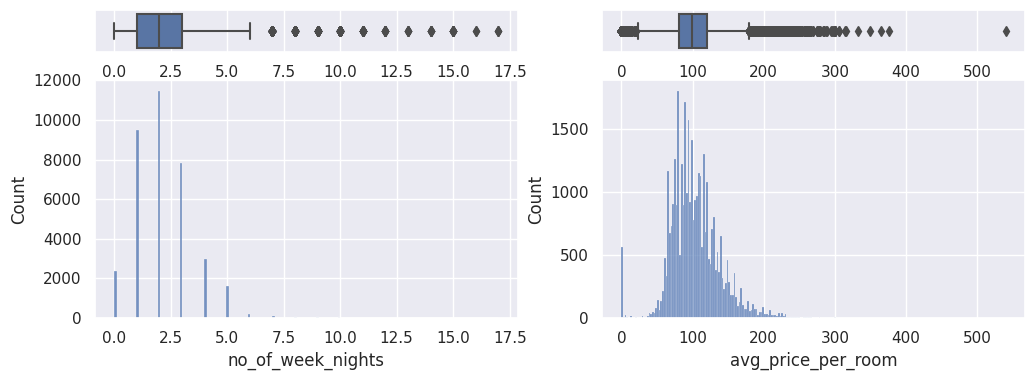

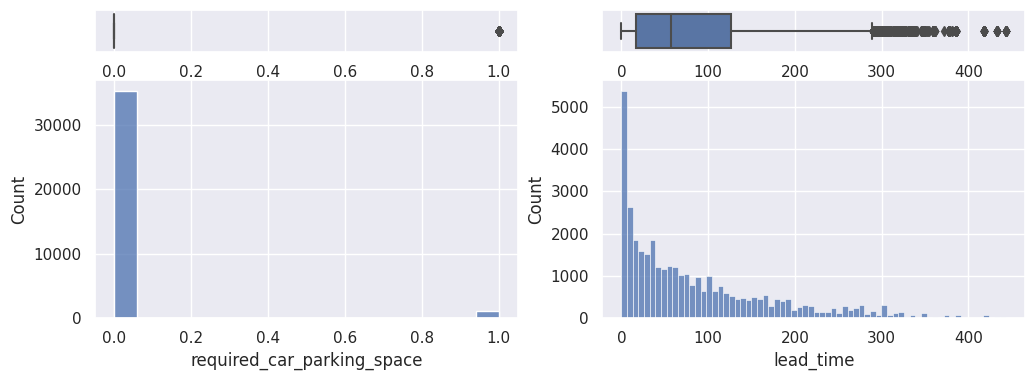

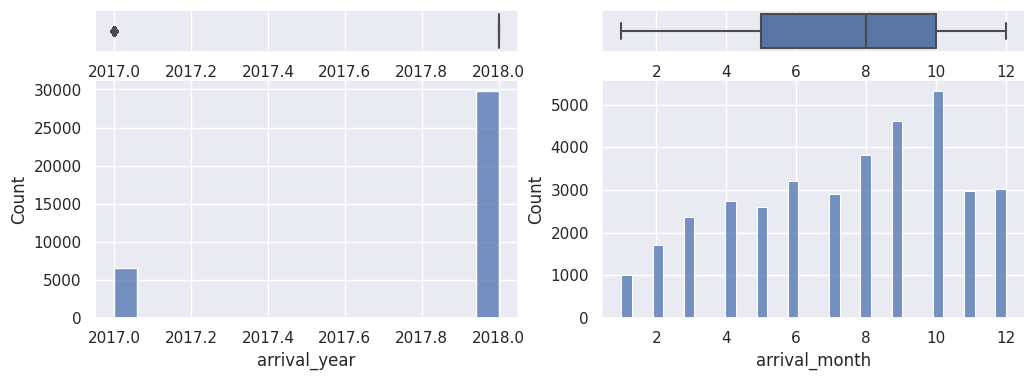

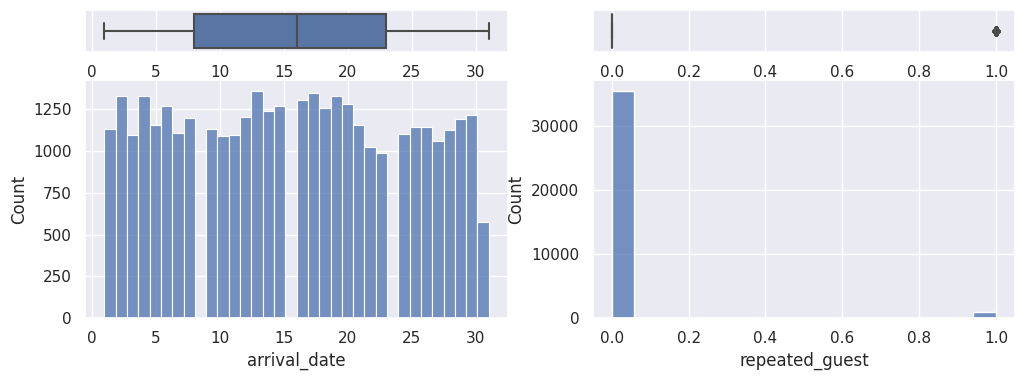

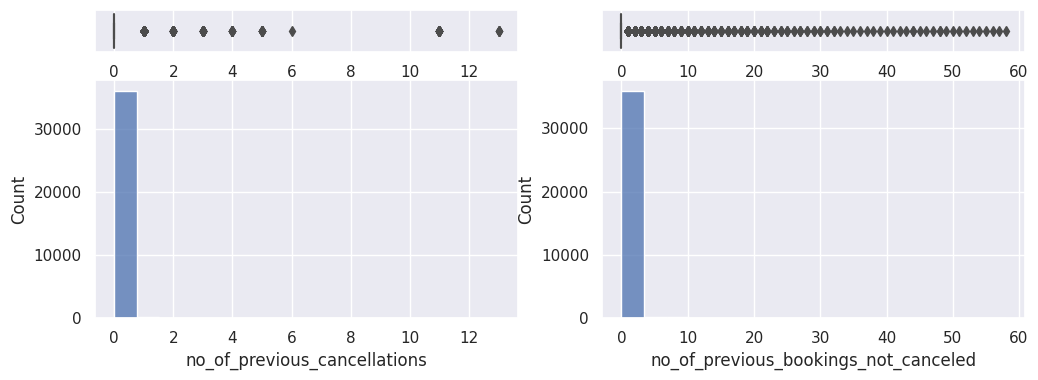

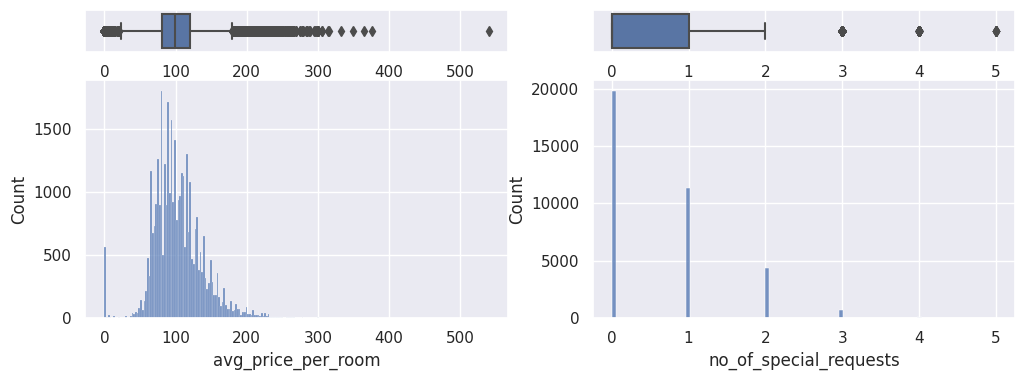

In [26]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(df, 'no_of_adults', 'no_of_children')
print_box_hist(df, 'lead_time', 'no_of_weekend_nights')
print_box_hist(df, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(df, 'required_car_parking_space', 'lead_time')
print_box_hist(df, 'arrival_year', 'arrival_month')
print_box_hist(df, 'arrival_date', 'repeated_guest')
print_box_hist(df, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(df, 'avg_price_per_room', 'no_of_special_requests')


In [27]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [28]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


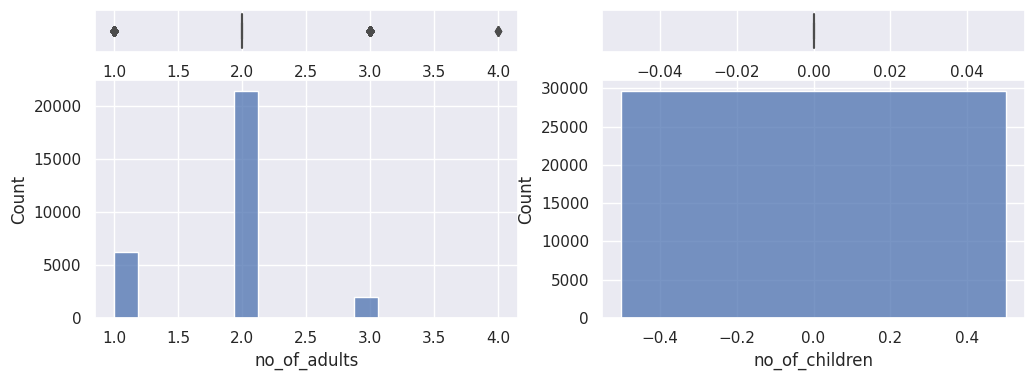

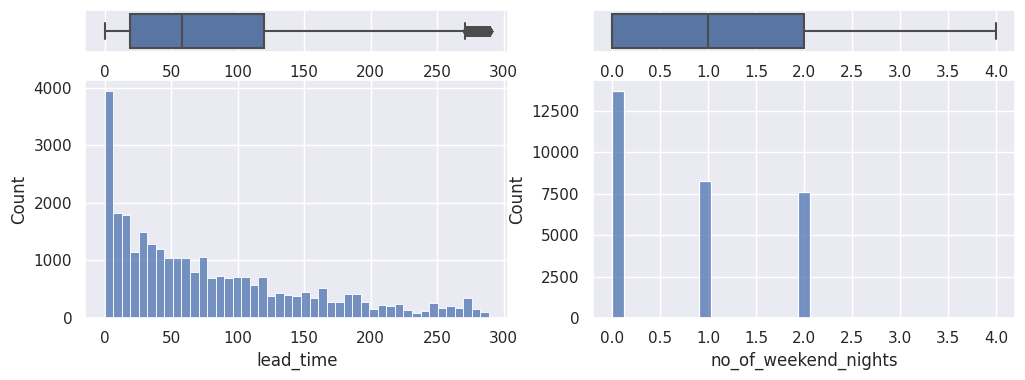

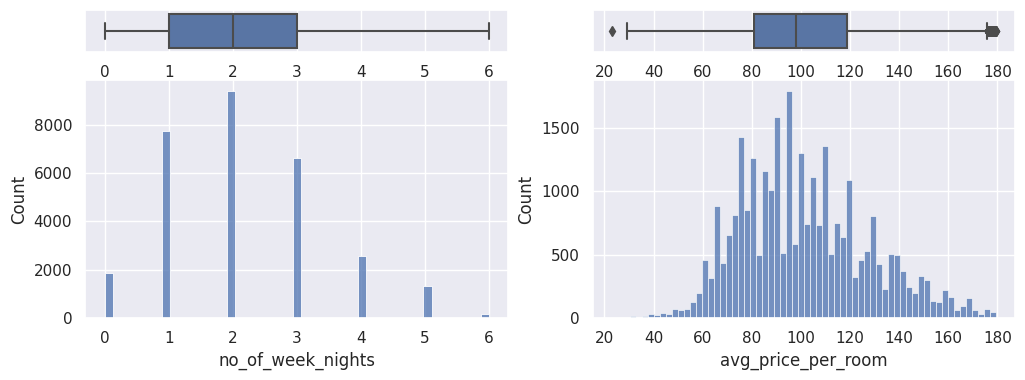

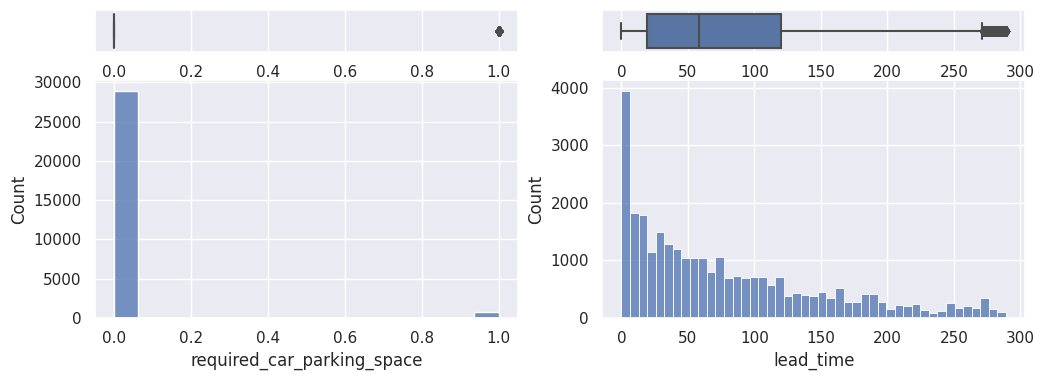

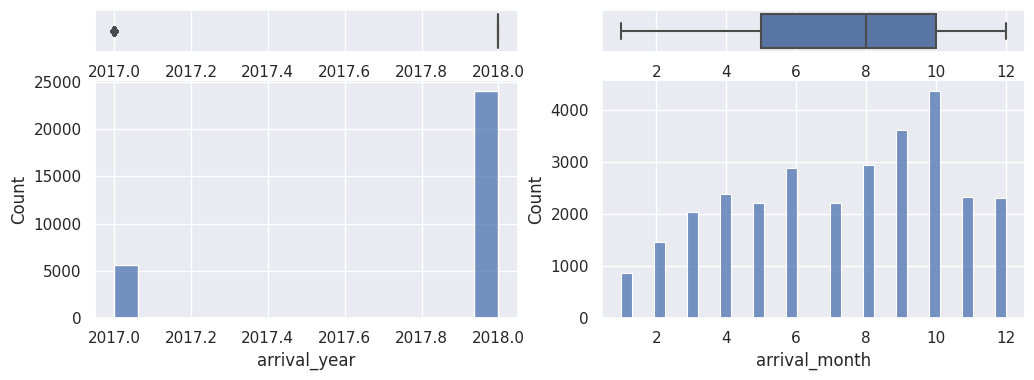

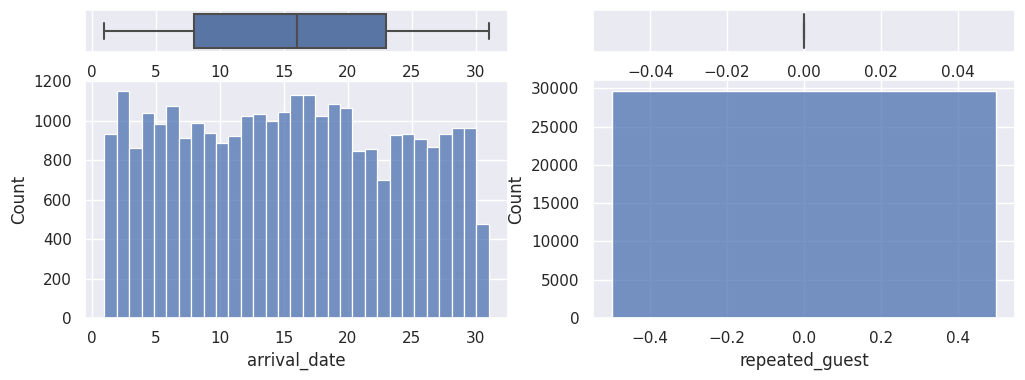

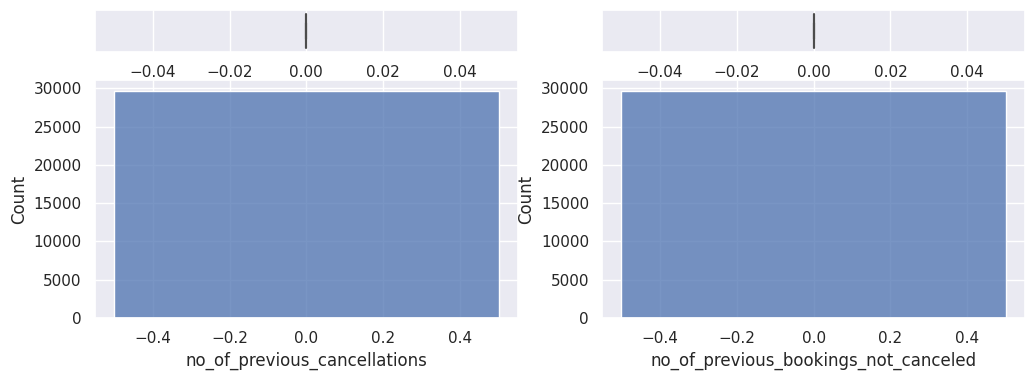

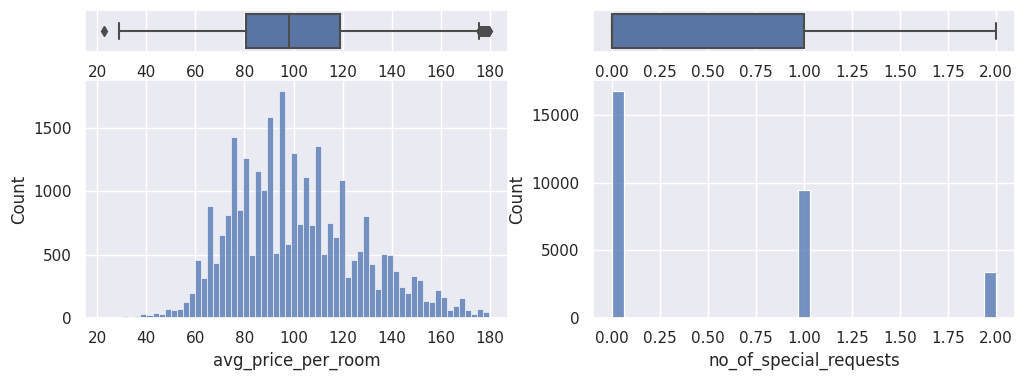

In [29]:
# removing the outluers from dataset
def remove_outliers(data, columns, lower_bound = 0.25, upper_bound = 0.75):
    masks = []
    for column in columns:
        q1 = data[column].quantile(lower_bound)
        q3 = data[column].quantile(upper_bound)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (data[column] >= lower) & (data[column] <= upper)
        masks.append(mask)

    # Combine the masks
    final_mask = np.all(masks, axis=0)
    # Remove outliers
    final_dataset = data[final_mask]

    return final_dataset

#removing outlers
columns=["no_of_children","lead_time","no_of_week_nights","avg_price_per_room","lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled","avg_price_per_room", "no_of_special_requests"]
removeOutliers= remove_outliers(df,columns)

print_box_hist(removeOutliers, 'no_of_adults', 'no_of_children')
print_box_hist(removeOutliers, 'lead_time', 'no_of_weekend_nights')
print_box_hist(removeOutliers, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(removeOutliers, 'required_car_parking_space', 'lead_time')
print_box_hist(removeOutliers, 'arrival_year', 'arrival_month')
print_box_hist(removeOutliers, 'arrival_date', 'repeated_guest')
print_box_hist(removeOutliers, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(removeOutliers, 'avg_price_per_room', 'no_of_special_requests')

 ### **Cleaning columns**

In [30]:
#Update data types for binary variables
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')

In [31]:
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
df['no_of_previous_cancellations'].value_counts()


0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [32]:
# Create a new column 'no_of_previous_cancellations' with values '0', '1-3', and '5+'
df['no_of_previous_cancellations'] = pd.cut(df['no_of_previous_cancellations'],
                                      bins=[-1, 0, 3, float('inf')],
                                      labels=['0', '1-3', '5+'],
                                      right=False)
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
df['no_of_previous_cancellations'].value_counts()

1-3    36181
5+        94
0          0
Name: no_of_previous_cancellations, dtype: int64

##**Exploratory Data Analysis**

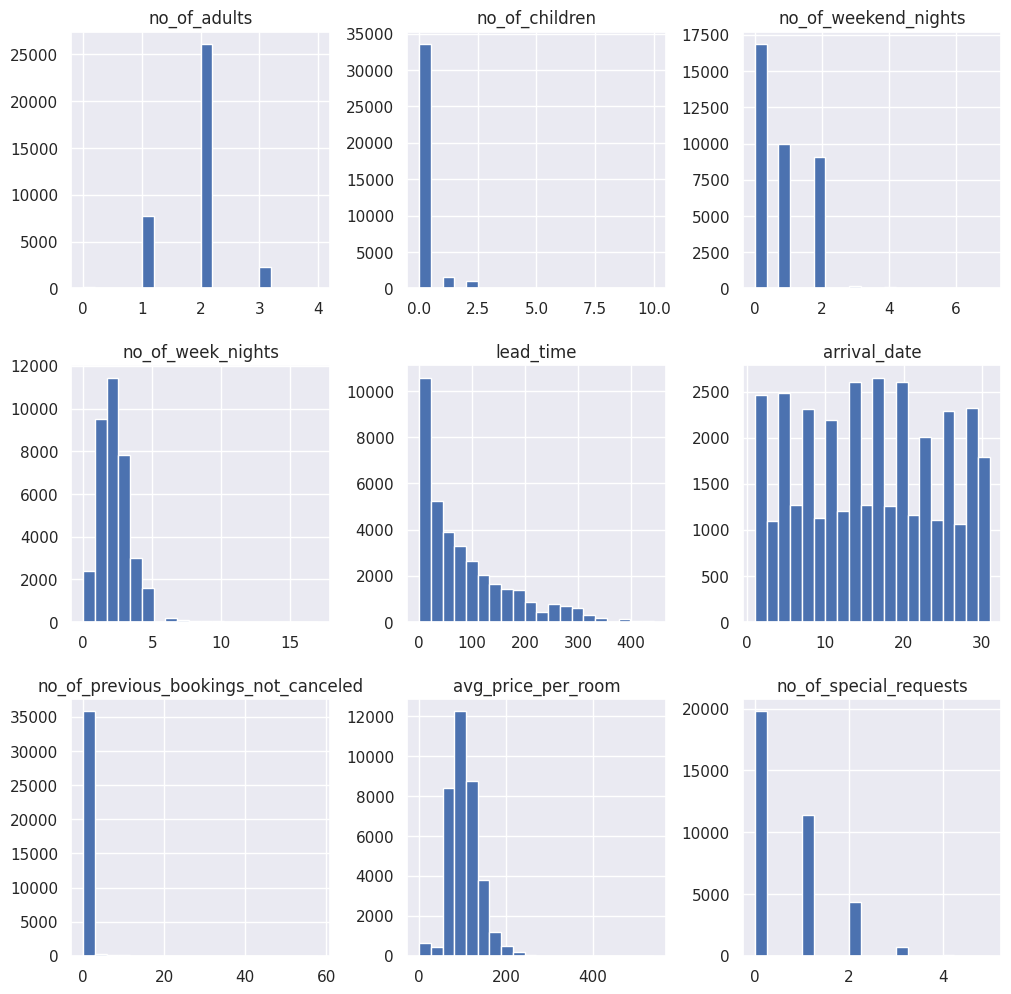

In [33]:
#Distributions for numerical variables
df.hist(figsize=(12,12),bins=20)
plt.show()

<ipython-input-34-c67fa12cc667>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)


<Axes: title={'center': 'Heat Map of Correlation Coefficients'}>

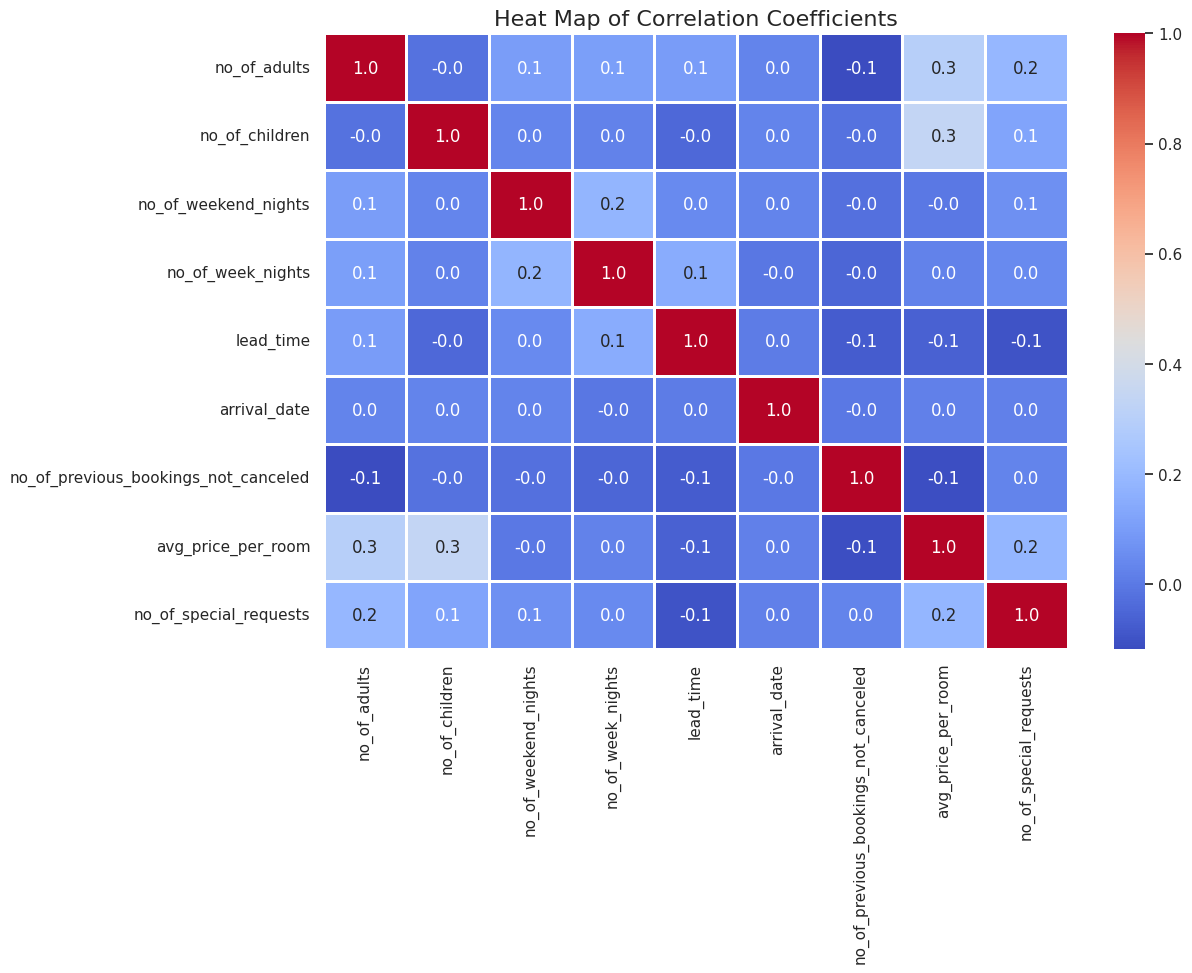

In [34]:
#Correlations between numerical variables
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

In [35]:
#All numerical values have low to no correlation with each other
df.corr()

<ipython-input-35-74a165bd6b0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.026338,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,0.025482,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,0.027304,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,-0.009305,-0.049344,0.022753,0.045994
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.006479,-0.078137,-0.062596,-0.101645
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.006479,1.000000,-0.001498,0.017898,0.018352
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,-0.001498,1.000000,-0.113684,0.027377
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,0.017898,-0.113684,1.000000,0.184381
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.101645,0.018352,0.027377,0.184381,1.000000


In [36]:
# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children',
                   'no_of_weekend_nights', 'no_of_week_nights',
                   'required_car_parking_space', 'lead_time', 'arrival_year',
                   'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

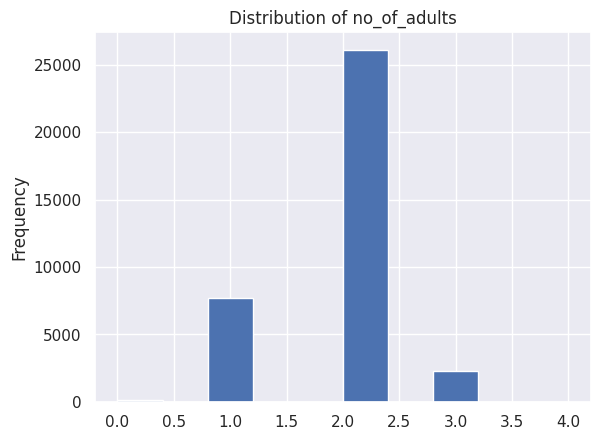

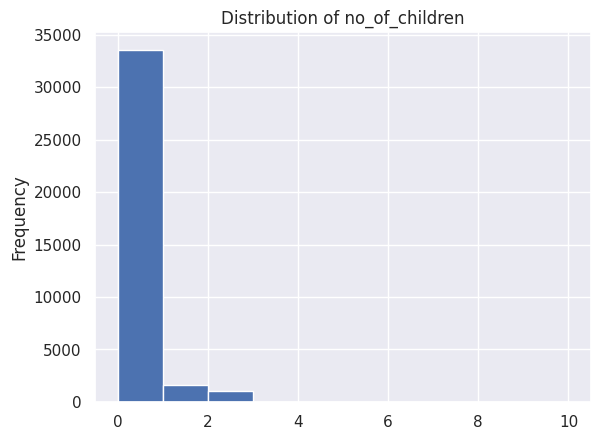

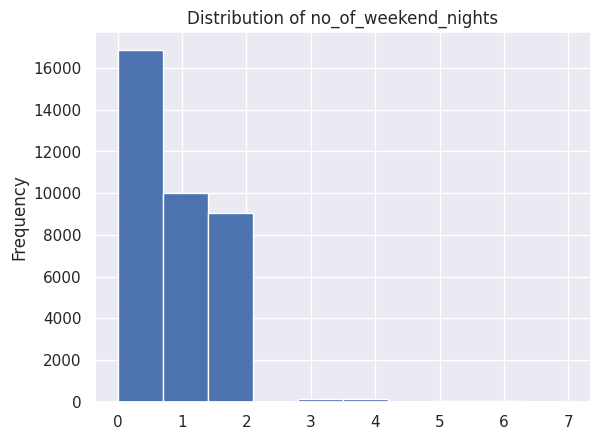

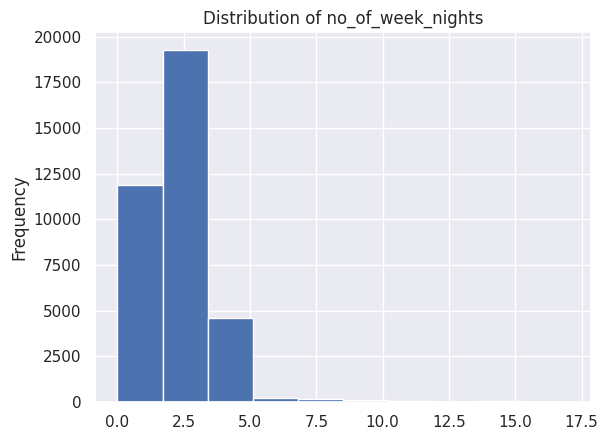

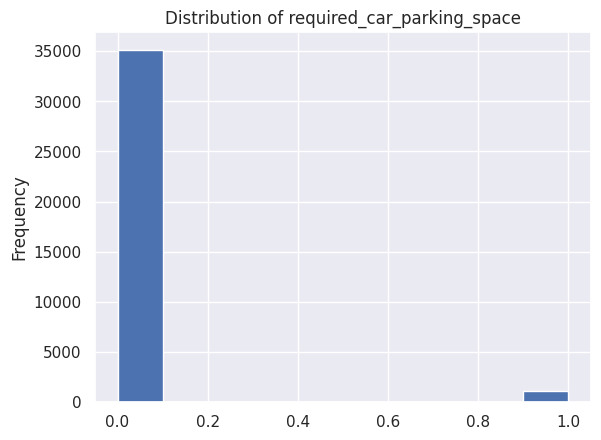

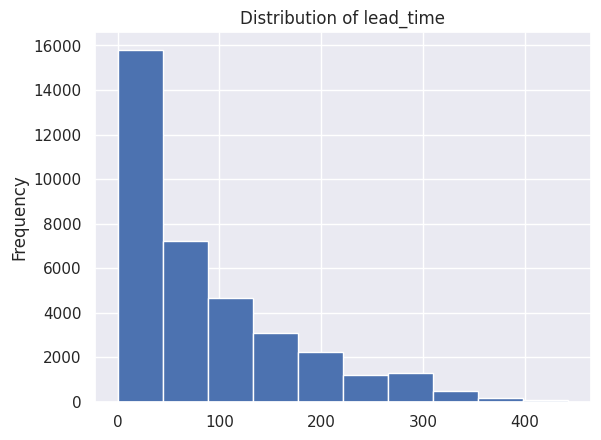

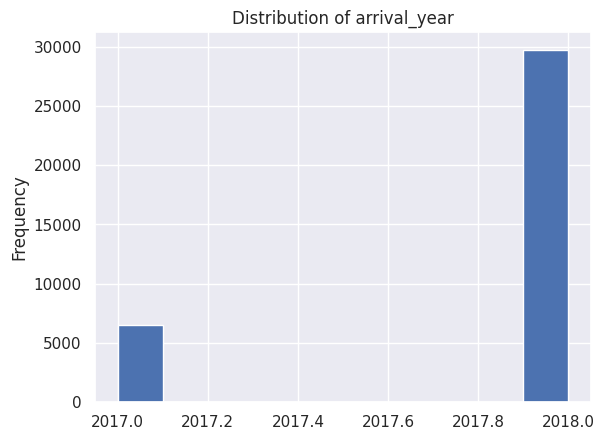

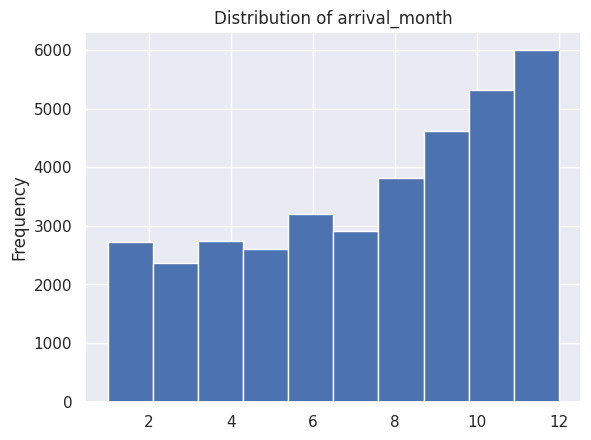

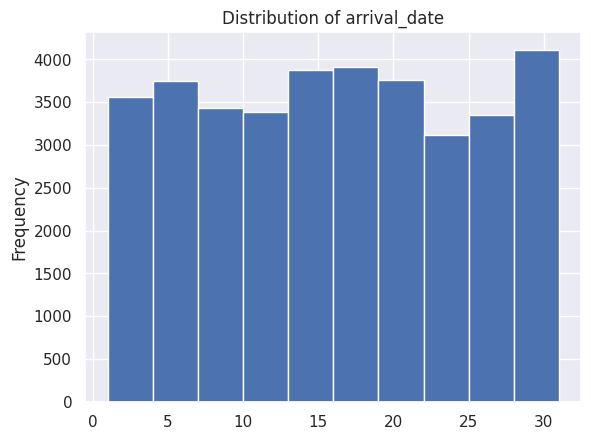

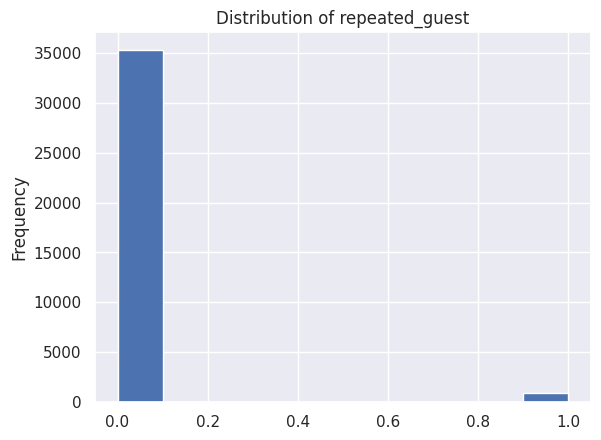

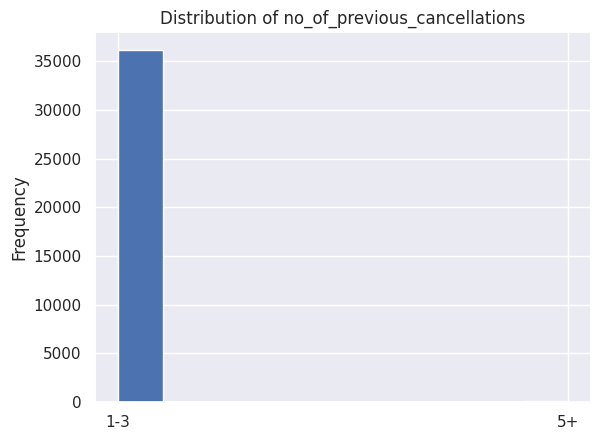

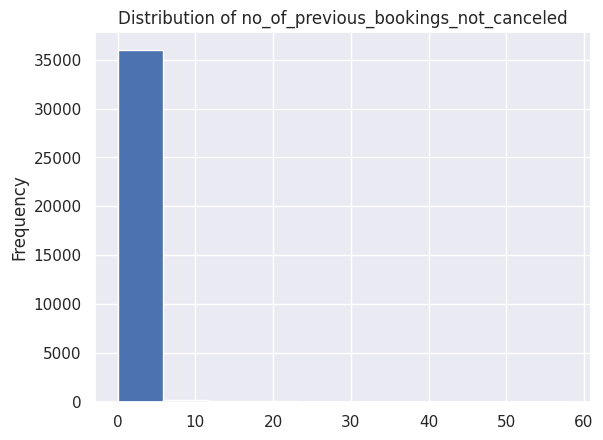

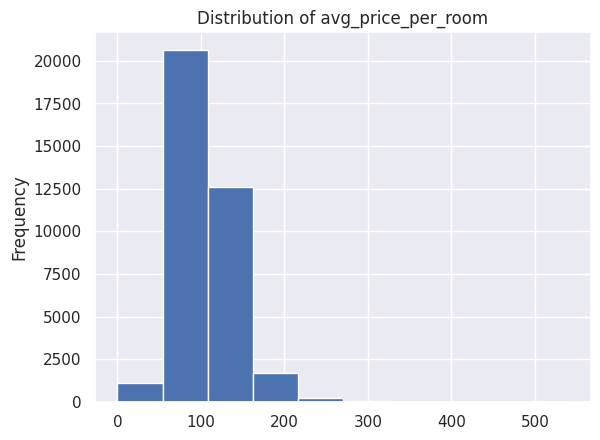

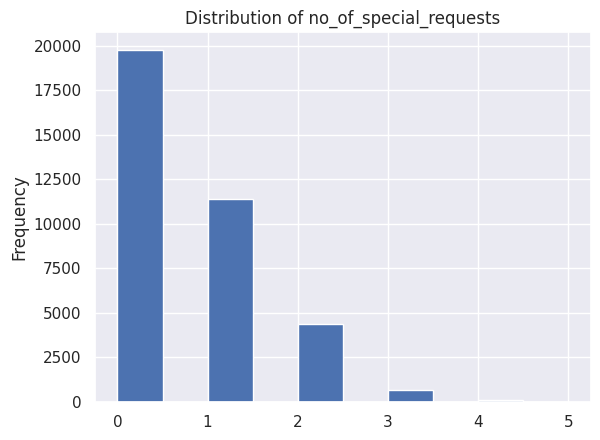

In [37]:
# Histograms for numerical variables
for column in df[numeric_columns].columns:
    plt.hist(df[numeric_columns][column])
    plt.title(f"Distribution of {column}")
    plt.ylabel("Frequency")
    plt.show()

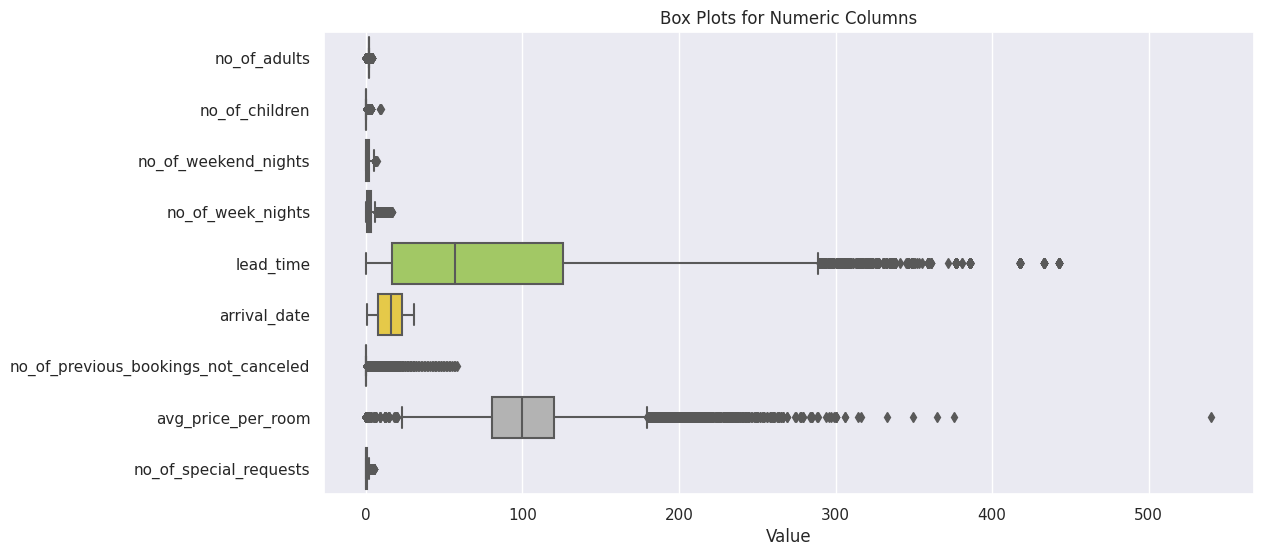

In [38]:

# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


In [39]:
df_cat = df[['type_of_meal_plan',
             'room_type_reserved',
             'market_segment_type',
             'repeated_guest']]
# Create cross-tab for categorical variables
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation                   37            88
Complementary               0           391
Corporate                 220          1797
Offline                  3153          7375
Online                   8475         14739


booking_status  Canceled  Not_Canceled
repeated

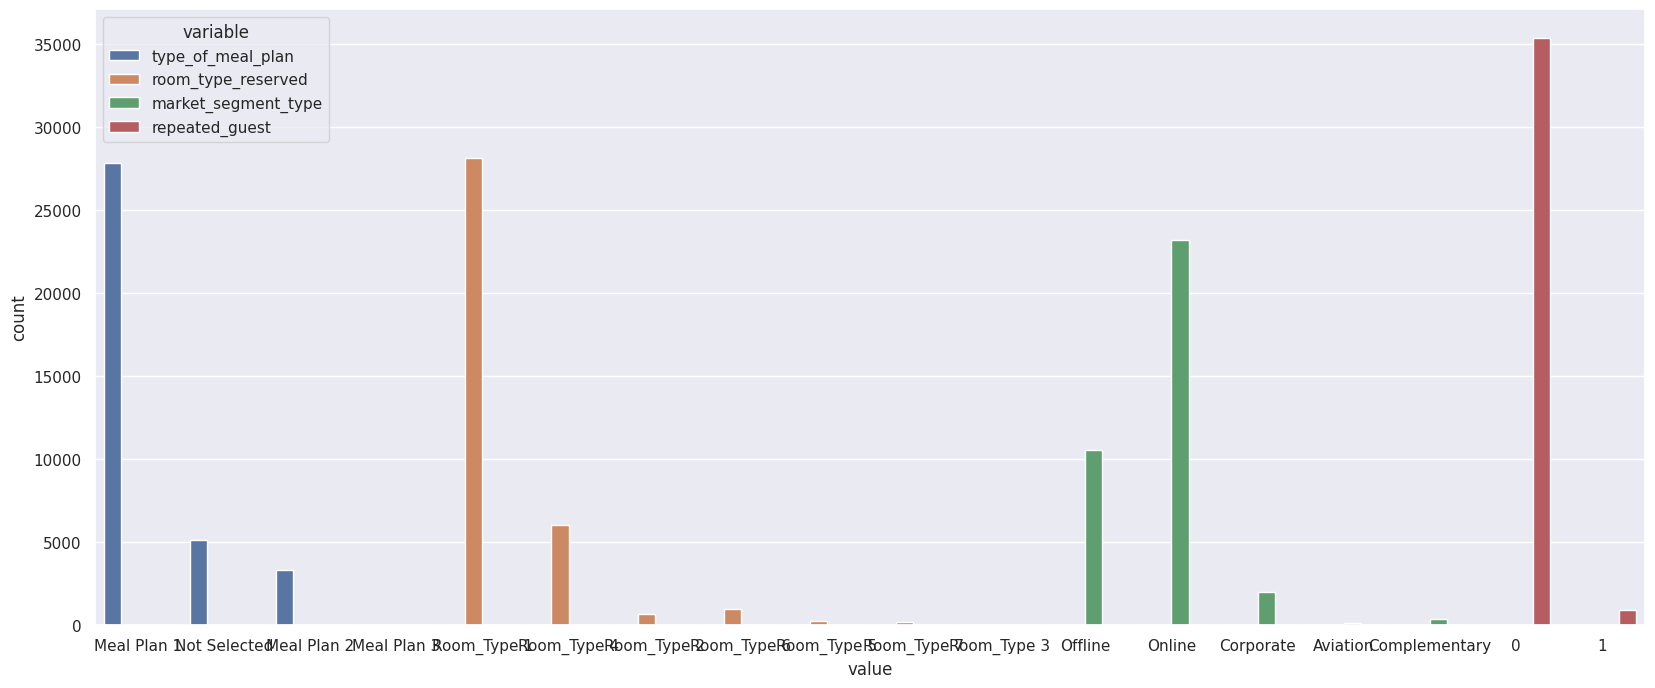

In [40]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(df, value_vars=df_cat[0:4]))
plt.show()

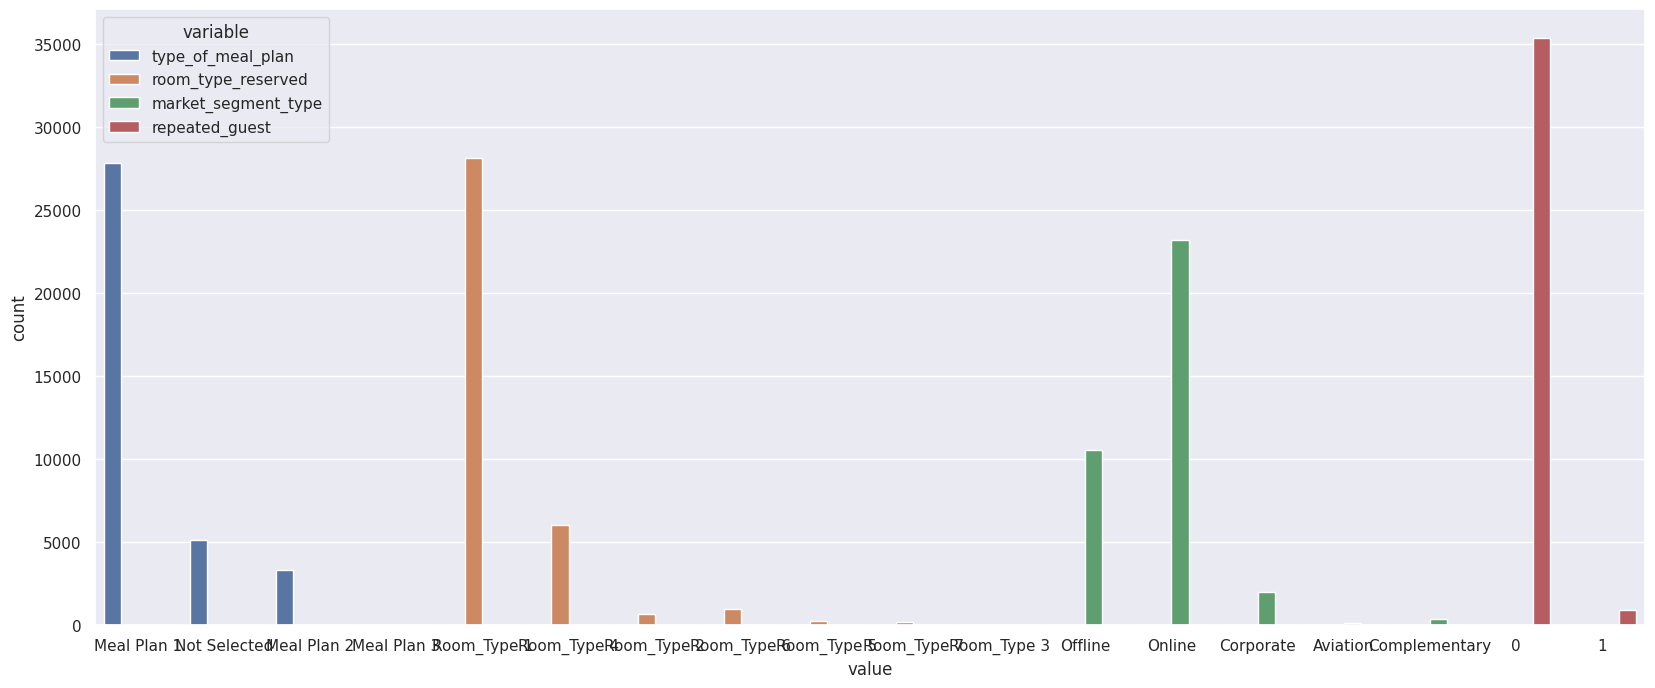

In [41]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(df, value_vars=df_cat[4:7]))
plt.show()

Checking for outlier

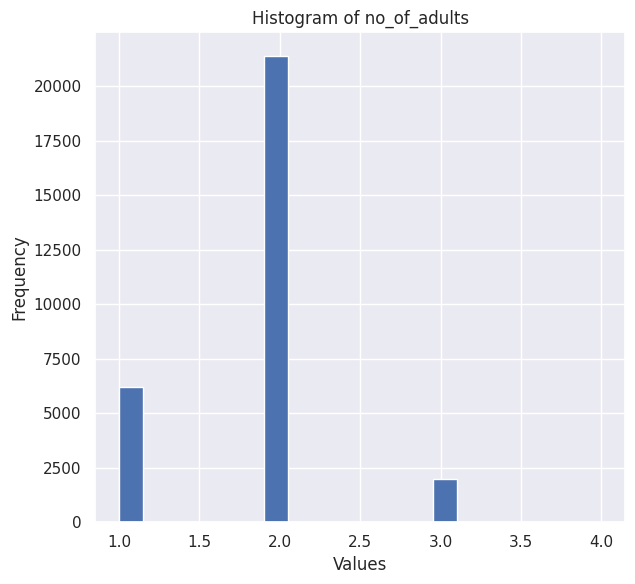

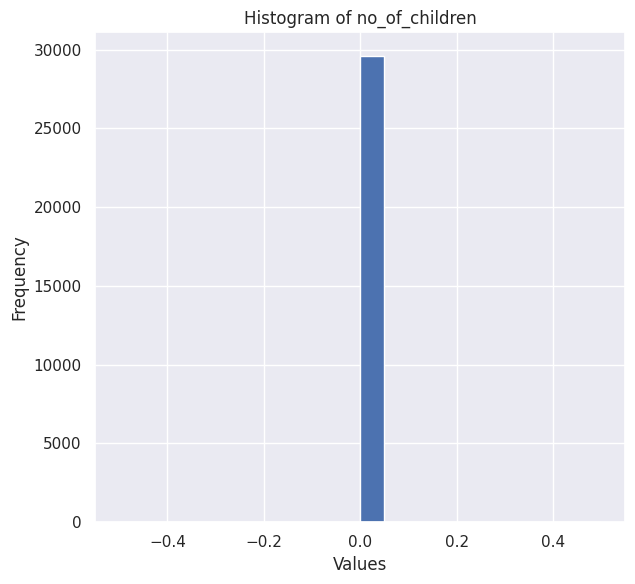

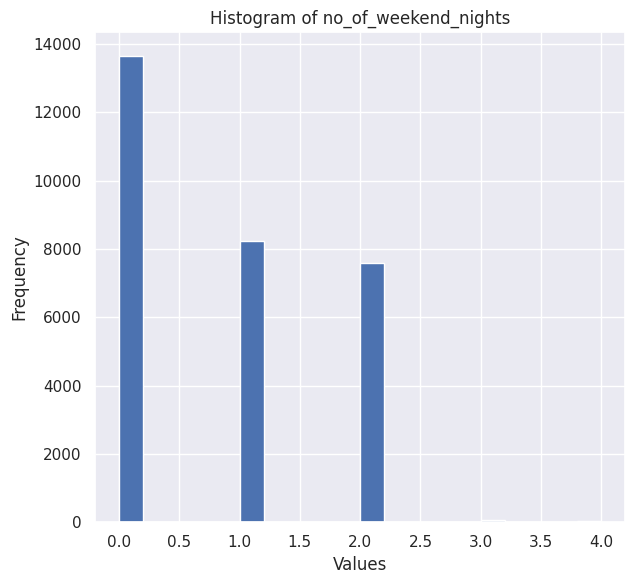

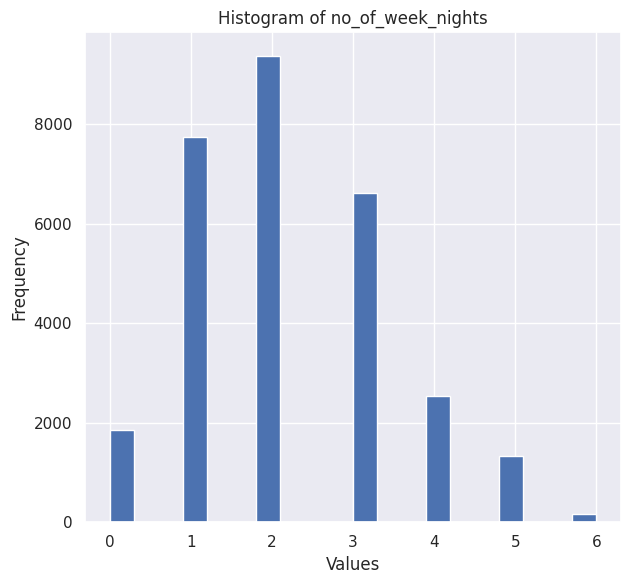

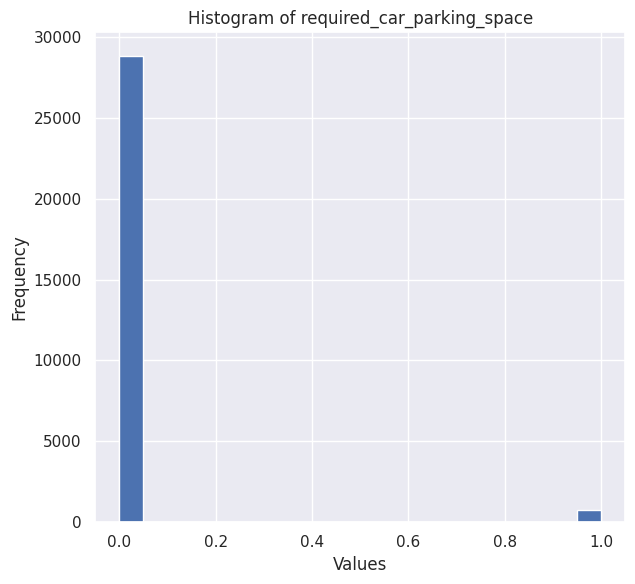

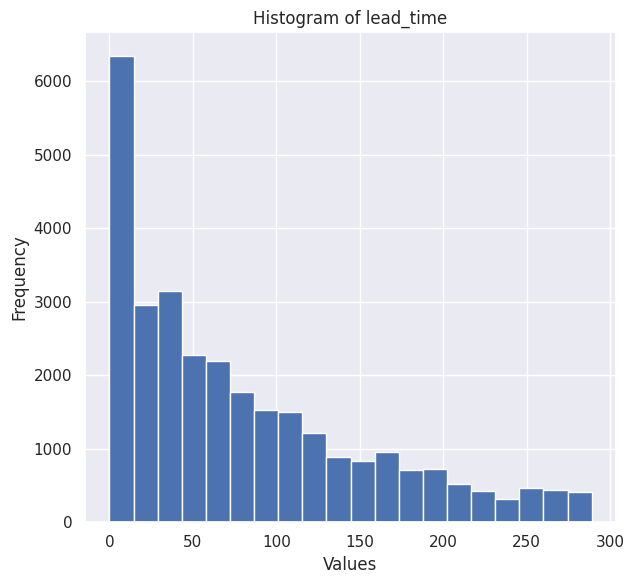

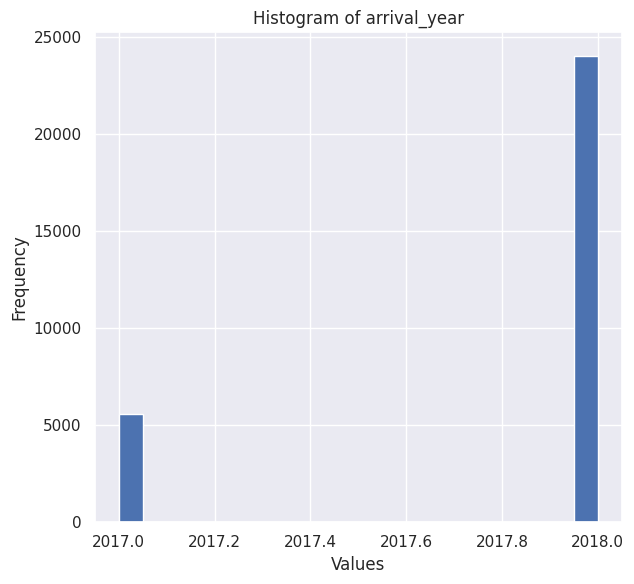

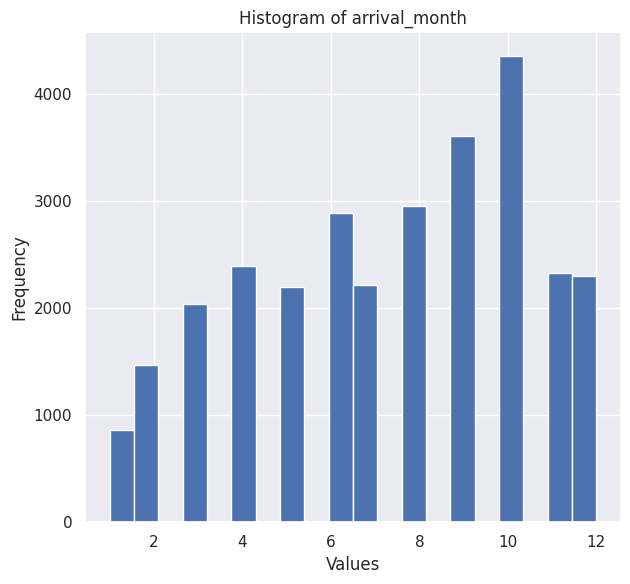

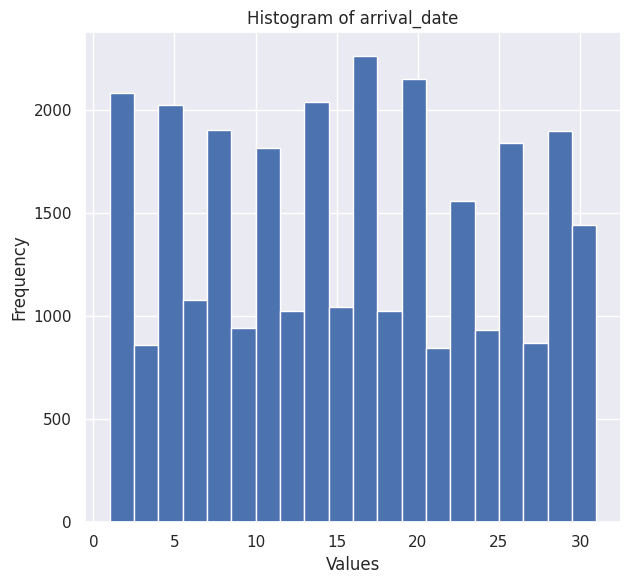

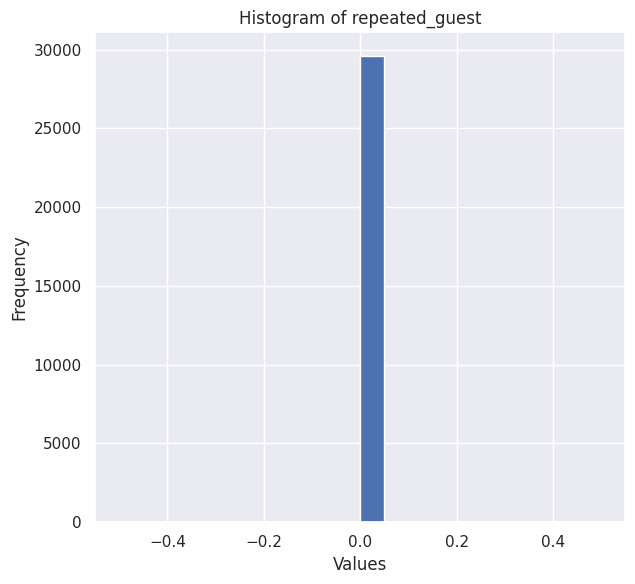

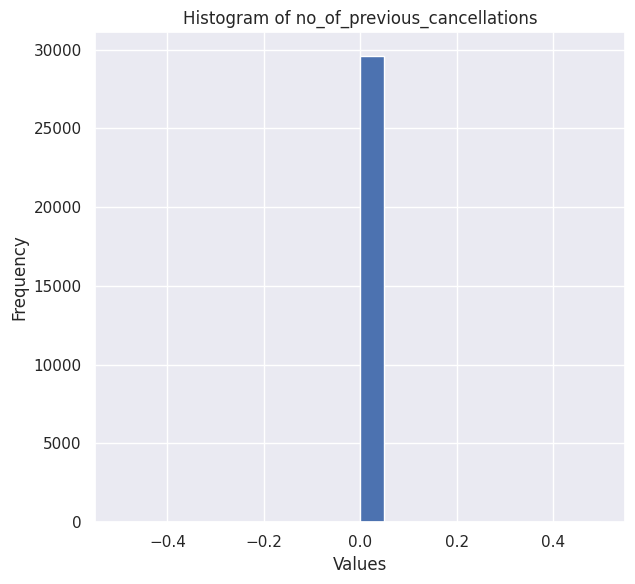

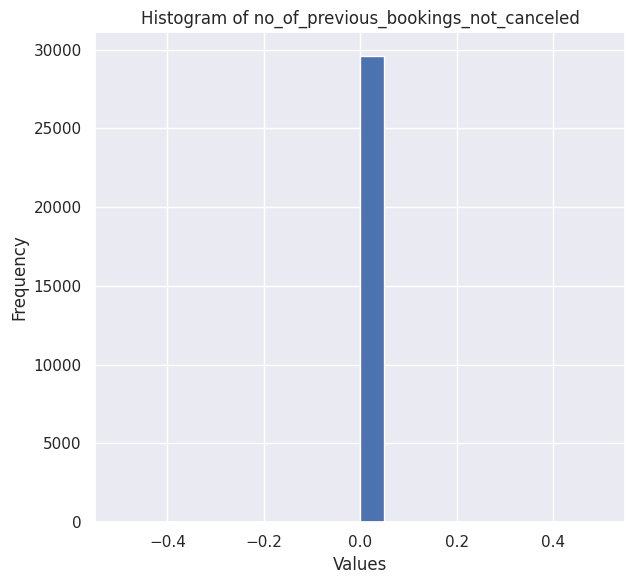

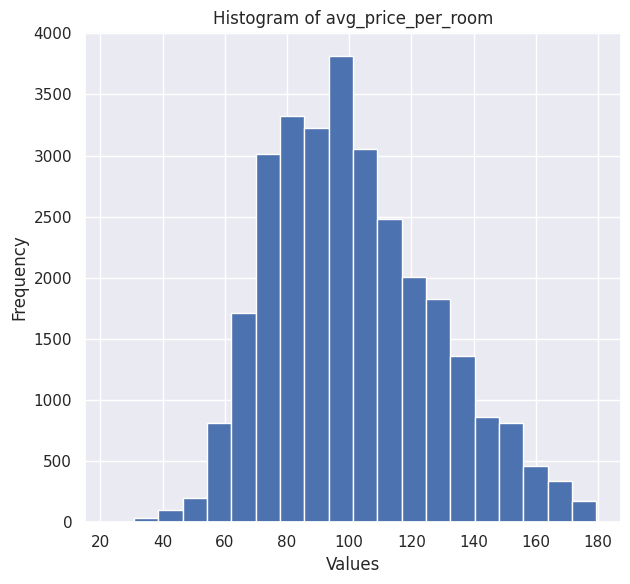

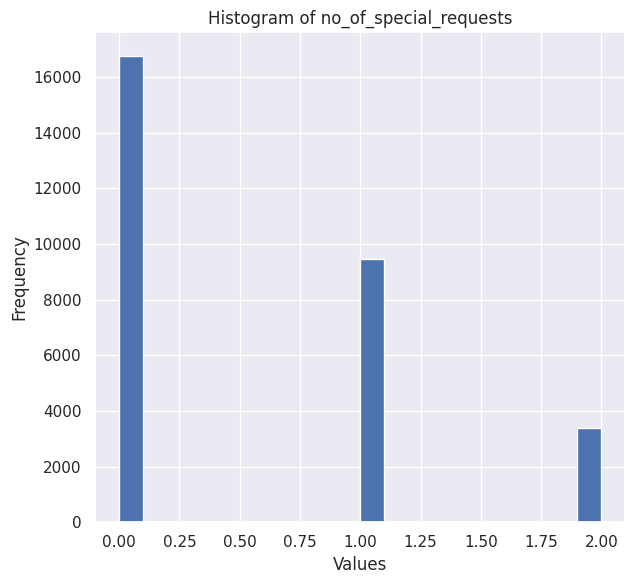

In [42]:
#some Histograms for the numerical clumns
for col in numeric_cols(removeOutliers):
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(removeOutliers[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [43]:
categorical_columns= removeOutliers[[ 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]
categorical_columns

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


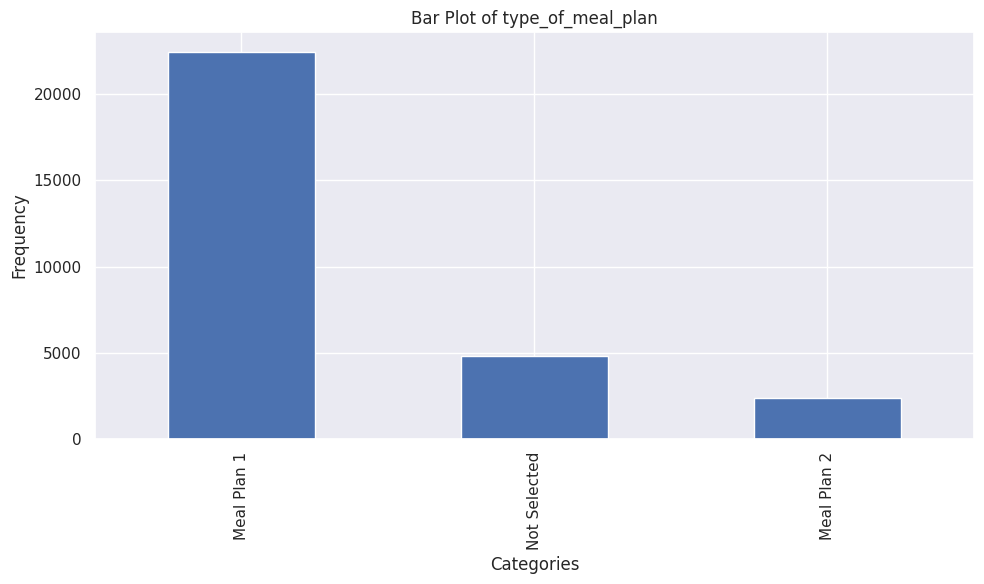

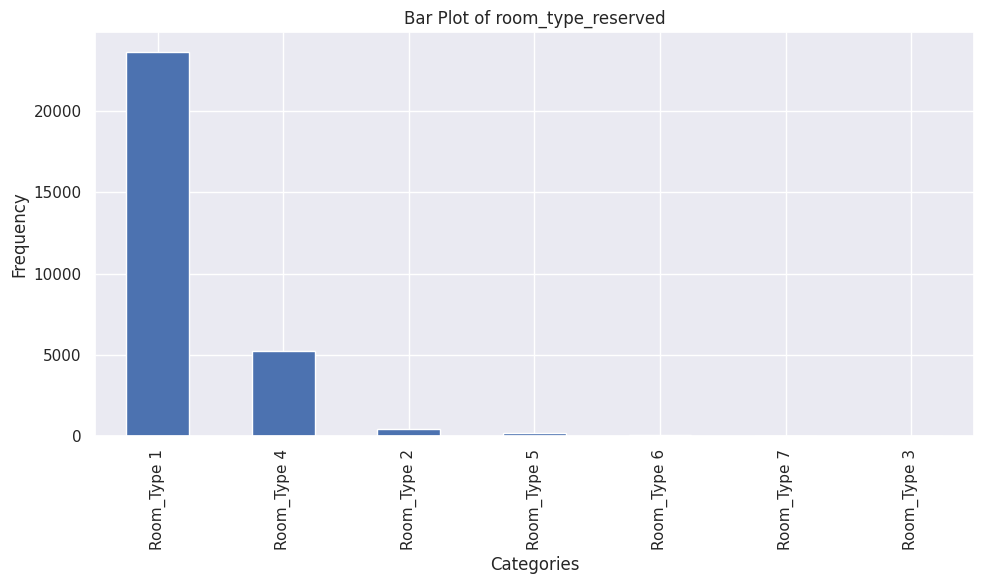

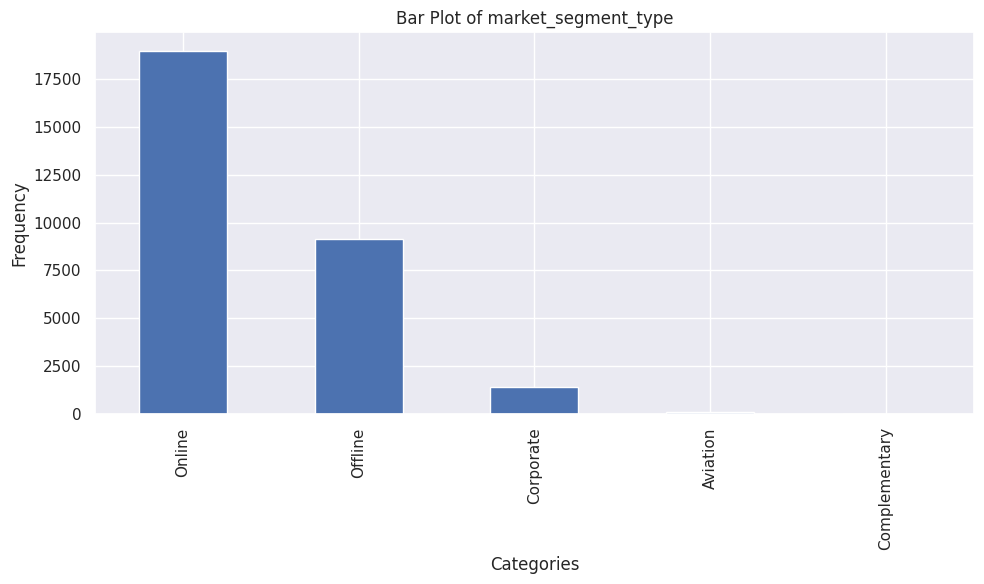

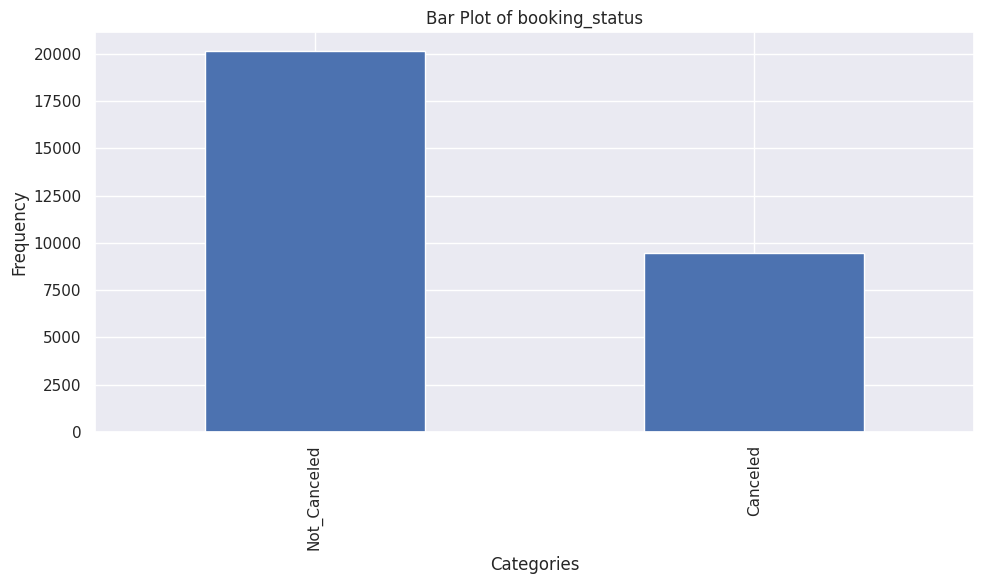

In [44]:
# Create bar plots for all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = removeOutliers[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

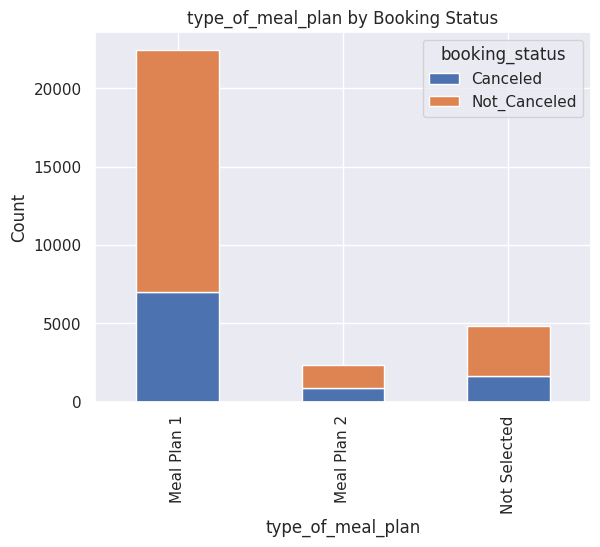

<Figure size 1000x600 with 0 Axes>

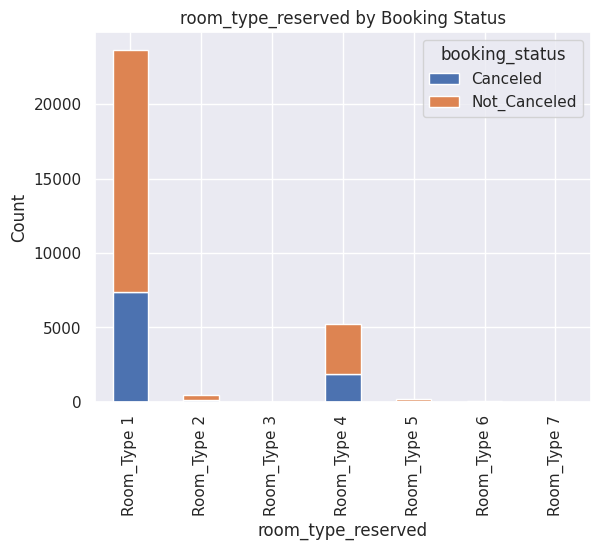

<Figure size 1000x600 with 0 Axes>

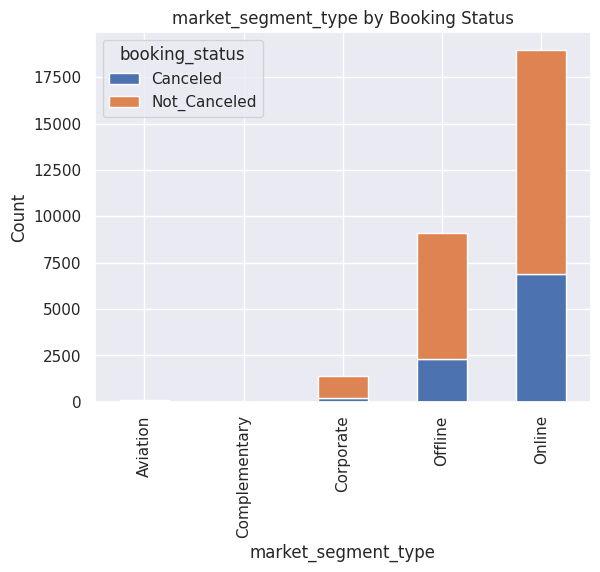

<Figure size 1000x600 with 0 Axes>

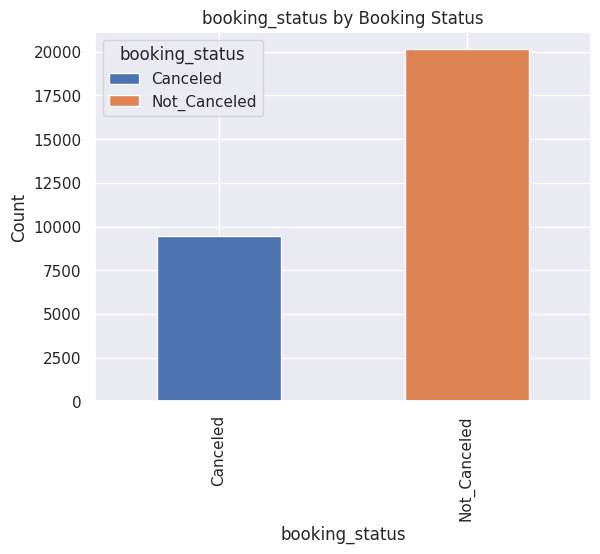

In [45]:
# Create stacked bar charts
for col in categorical_columns:
  plt.figure(figsize=(10, 6))

  # plot
  cross_tab = pd.crosstab(index=removeOutliers[col], columns=removeOutliers['booking_status'])
  cross_tab.plot(kind='bar', stacked=True)
  plt.title(f"{col} by Booking Status")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

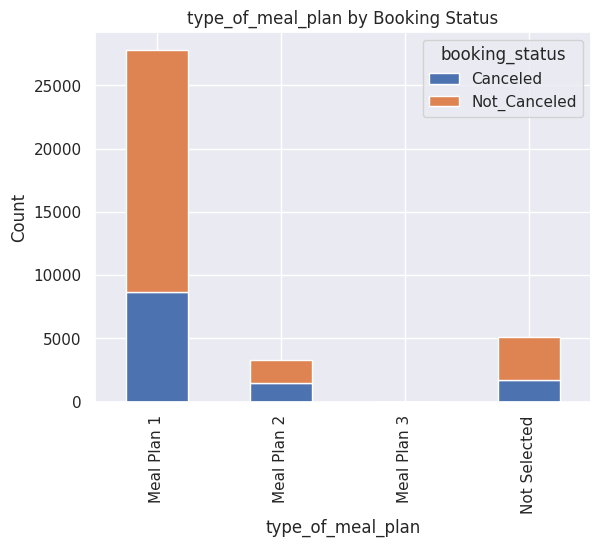

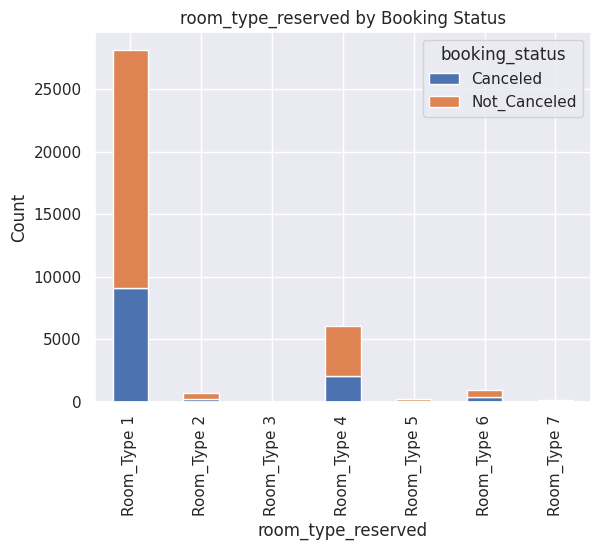

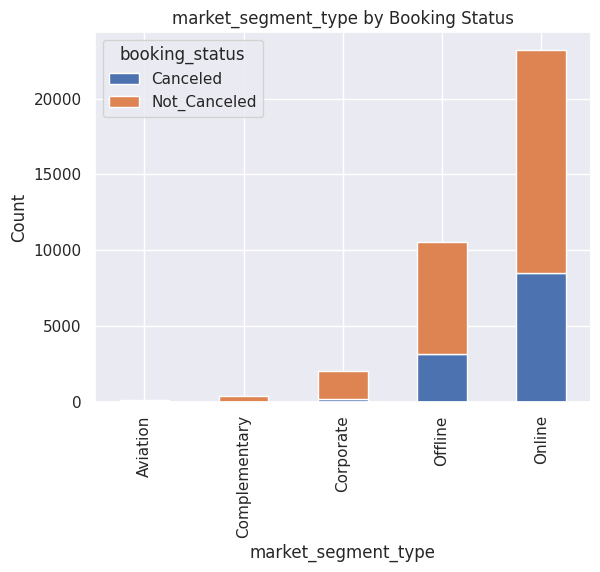

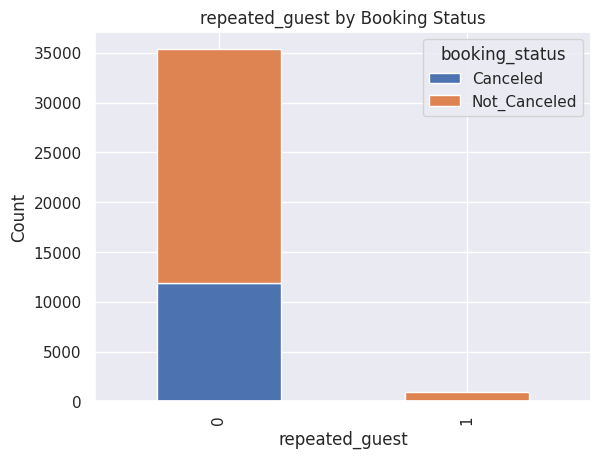

In [46]:
# Stacked bar charts
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{column} by Booking Status")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### **Time Series**

In [48]:
# Combine year, month, day into 1 column in datetime format ('full_arrival_date')
df['day']=df['arrival_date'].copy()
df['month']=df['arrival_month'].copy()
df['year']=df['arrival_year'].copy()
df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')

In [56]:
# New outcome variable
df['booking_status_binary']=pd.get_dummies(df['booking_status'],drop_first=True)

Text(0.5, 1.0, 'All Reservations')

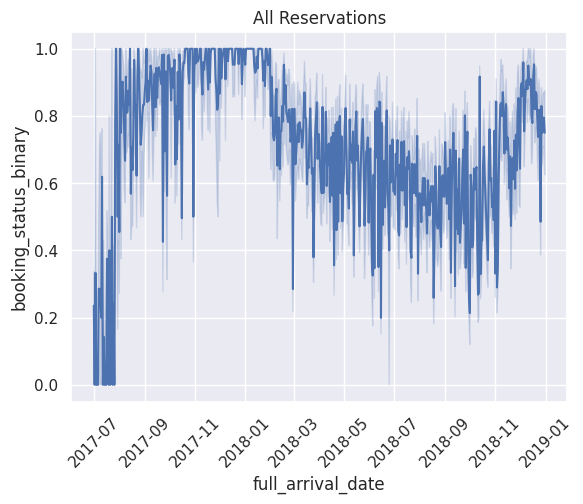

In [58]:
# All reservations time-series (takes ~25 sec to run)
sns.lineplot(data=df, x='full_arrival_date', y='booking_status_binary')
plt.xticks(rotation=45)
plt.title('All Reservations')


## **Data Split and Preprocessing Pipeline**

In [59]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,day,month,year,full_arrival_date,booking_status_binary
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,1-3,0,65.00,0,Not_Canceled,2,10,2017,2017-10-02,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,1-3,0,106.68,1,Not_Canceled,6,11,2018,2018-11-06,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,1-3,0,60.00,0,Canceled,28,2,2018,2018-02-28,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,1-3,0,100.00,0,Canceled,20,5,2018,2018-05-20,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,1-3,0,94.50,0,Canceled,11,4,2018,2018-04-11,0


In [63]:
df.booking_status_binary

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_binary, Length: 36275, dtype: uint8

In [95]:
X = df.drop(['booking_status','booking_status_binary'], axis=1)
y = df['booking_status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [99]:
X_train.shape, X_val.shape, X_test.shape

((15000, 22), (12000, 22), (9275, 22))

In [100]:
#Final list of variables
cats_final = ['required_car_parking_space','repeated_guest','meal_plan','room_type_reserved', 'market_segment_type']
nums_final = ['no_of_adults', 'no_of_children', 'lead_time', 'no_of_previous_cancellations', 'total_nights',
              'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [101]:
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats_final),('num', num_pipe, nums_final)]))
all_pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['required_car_parking_space',
                                                   'repeated_guest',
                                                   'meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type']),
                                                 ('num',
                                                  Pipeline(steps=[('variance',
                                                                   VarianceThreshold()),
                                                                  ('skew_standardize',
                                                                   PowerTransformer())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'total_nights',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])]))])

# References
 * https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/